In [27]:
#Implementation  of chatbot using langgraph

In [ ]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage,AIMessage


In [ ]:
#Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
    # In here inside the ANNOTATED WE INSERT LSIT AND THER EUCER THAT IS AVAILABLE
    messages:Annotated[list,add_messages]

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [ ]:
from langchain_groq import ChatGroq
llm=ChatGroq(model='openai/gpt-oss-120b')

In [ ]:
llm.invoke("Hello, how are you?").content

"Hello! I'm doing great, thanks for asking. How can I help you today?"

In [22]:
def superbot(state:State):
    return {'messages':{llm.invoke(State['messages'])}}
    

In [23]:
graph=StateGraph(State)


In [24]:
graph.add_node('superbot',superbot)

In [25]:
graph.add_edge(START,"superbot")
graph.add_edge('superbot',END)

In [26]:
graph_builder=graph.compile()

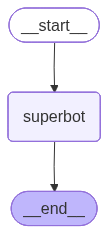

In [27]:
from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [32]:
graph_builder.stream({'messages':" Hi,My name is Paras"})

<generator object Pregel.stream at 0x00000268CE5C68E0>